In [13]:
import pandas as pd
import tensorflow as tf

from tensorflow.python.keras import optimizers
from tensorflow import keras

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score

In [14]:
# Set to 1 if you intend to have a validation set
val = 0
# Set to 1 if you intend to create a csv with the result
create_csv = 1

x_train_dir = 'X_train.csv'
y_train_dir = 'y_train.csv'
x_test_dir = 'X_test.csv'
y_test_dir = 'y_test.csv'

x_train = pd.read_csv(x_train_dir)
x_train = x_train.drop(columns=['id'])
y_train = pd.read_csv(y_train_dir)
y_train = y_train.drop(columns=['id'])
x_test = pd.read_csv(x_test_dir)
x_test = x_test.drop(columns=['id'])

# To arrays
x_train_npa = x_train.values
y_train_npa = y_train.values
x_test_npa  = x_test.values

# Dimensions
train_datap = x_train.shape[0]
test_datap = x_test.shape[0]
n_features = x_train.shape[1]

In [20]:
#look for outliers in strictly positive/negative features
\
for i in range(n_features):
    xti = x_test.iloc[i,:]
    xti_max = np.amax(x_test)
    print(xti_max)
    xti_min = np.amin(x_test)
    if(np.sign(xti_max)==np.sign(xti_min)):
        print(i)



x0      134745.409152
x1        6729.412088
x2      136114.002345
x3        1313.471136
x4       13166.911774
            ...      
x827    109975.487034
x828     10827.379766
x829        13.245495
x830    109992.345836
x831         2.676926
Length: 832, dtype: float64


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [43]:
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])
test_set_range = x_test.apply(minMax)
mins = test_set_range.loc['min']
maxs = test_set_range.loc['max']


In [44]:
over  = x_train.values < mins.values
under = x_train.values > maxs.values

/Users/Seb/anaconda3/envs/aml/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
/Users/Seb/anaconda3/envs/aml/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


In [8]:
#MEDIAN VALUE IMPUTATION
x_train_mi = np.empty(np.shape(x_train_npa))
x_test_mi = np.empty(np.shape(x_test_npa))

for i in range(n_features):
    mn = np.nanmedian(x_train_npa[:,i])
    x_train_mi[:,i] = np.nan_to_num(x_train_npa[:,i], nan = mn)
    #mn = np.nanmedian(x_test_npa[:,i]) #Can use test data for median value imputation? Not worth it probably
    x_test_mi[:,i] = np.nan_to_num(x_test_npa[:,i], nan = mn)


In [3]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [4]:
imp = IterativeImputer(max_iter=10, initial_strategy='median',random_state=0)

In [5]:
x_train_filled = imp.fit_transform(x_train,y_train)


KeyboardInterrupt: 

In [ ]:
#X_test = [[np.nan, 2], [6, np.nan], [np.nan, 6]]

In [ ]:
# the model learns that the second feature is double the first
#print(np.round(imp.transform(X_test)))

In [ ]:
print(x_train_filled(x_train==NaN))

In [ ]:
print("hi")

In [4]:
import seaborn as sns


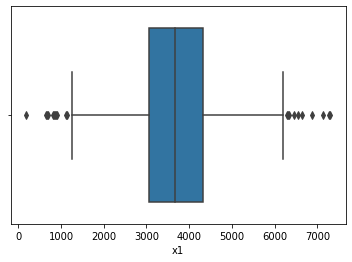

In [6]:
sns.boxplot(x=x_train['x1'])